#OutLine

1.   Frozen Lake 환경 설정

2.   Q-table 작성, Q-러닝 알고리즘 작성

3. Exploration 방법 설정


> * Random Noise
* Epsilon-greedy



4. SARSA

> * Random Noise
* Epsilon-greedy

5. 실험 환경 변경

> * Hole 위치 및 시작,목적지 변경
* 8x8 크기의 Frozen Lake 설정

6. 실험 변경(Taxi Environment)

# Q-러닝을 이용한 게임 실습(Frozen lake)

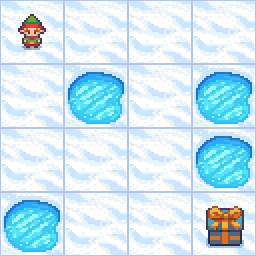

Frozen lake는 시작 지점과 도착 지점이 정해진 환경에서, 빙판길에 존재하는 구멍(Hole)을 피해 목적지에 도착하는 환경.
<br>
**상태: 4x4 = 16**
<br>
**행동: 상하좌우 = 4**
<br>
**보상: 목적지에 도착하는 경우 1, 나머지의 경우 모두 0**
<br>
**환경은 목적지에 도착하거나, 구멍에 빠지는 경우 에피소드 종료**

상태-행동 가치 함수인 Q값을 업데이트 하고, 이에 따라 정책을 업데이트 하는 예제 실습<br>
이 때  Q값을 저장하는 Q-table은 상태x행동 = 16x4 = 64의 크기를 가지는 행렬로 표현 가능

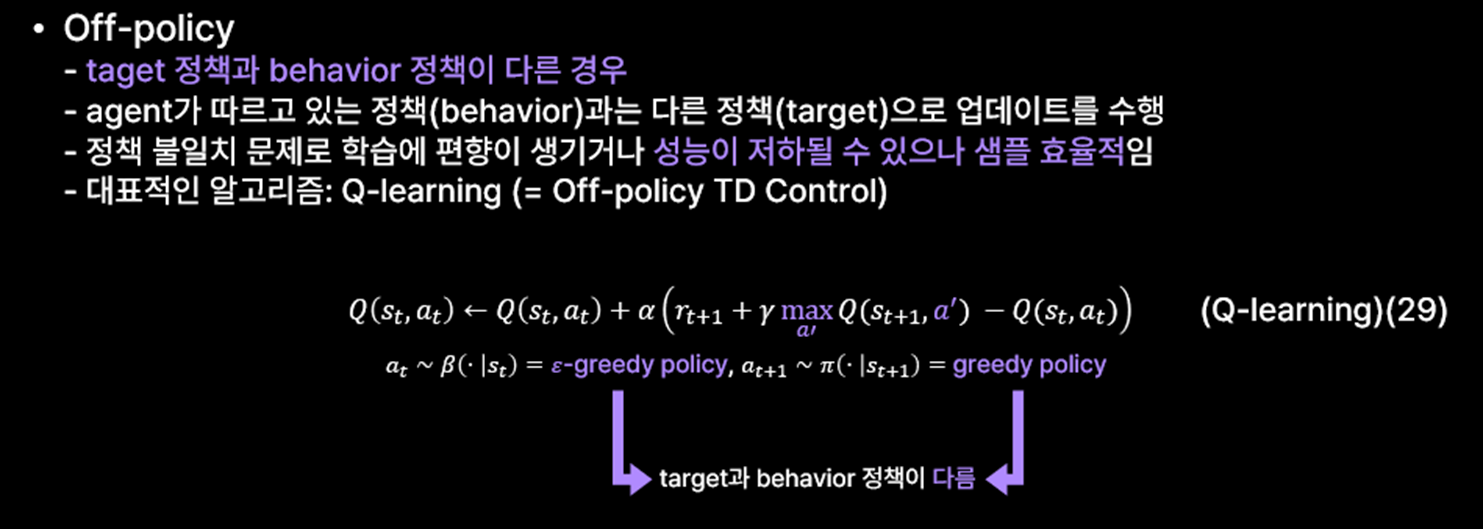

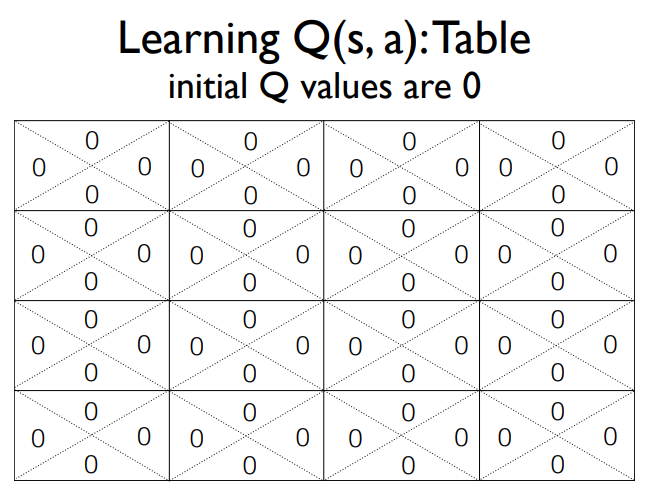

모든 Q값의 업데이트는 반드시 모든 state를 충분히 탐험해 보았음을 전제로 함.
<br>따라서 단순히 현재 최대값을 활용하는 방법이 아닌, 탐험을 진행하도록 action을 선택하는 방법이 필요.

# 1. random noise 방식

현재 state에서 가능한 action에 따른 Q값(총 4가지)에 random noise를 주어서, 이 것이 최대값이 되는 action을 선택.<br> noise가 Q값보다 큰 경우, Q값을 최대화 하는 action 대신 다른 action을 선택.<br> **처음엔 높은 noise 값을 주고, 학습이 진행됨에 따라 Q값이 안정화 되면 noise를 줄여가며 exploitation 위주의 학습 진행.**


In [ ]:
! pip install gym==0.15.3
!pip install numpy==1.23.5
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.3 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.15.3-py3-none-any.whl size=1644931 sha256=d9ad040c704703fb335c33e98a84f8ef019f655dd421fe5259d42ab54a33eb43
  Stored in directory: /root/.cache/pip/wheels/dc/4c/1c/25048a3f2e8540c60bbba0c25d8400f959205db1048431873a
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.18.0 requires cloudpick

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

In [ ]:
#register는 실험 환경에 대한 세팅으로, register를 수정함으로써 학습하려는 환경의 설정을 변경 가능

##############################코드 작성 ####################################


#############################################################################



/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:542: UserWarning: WARN: Overriding environment FrozenLake-v1
  logger.warn(f"Overriding environment {spec.id}")


In [ ]:
##############################코드 작성 ####################################

#env, Q-table 초기화


#############################################################################


print("Gym 환경:", env)
# Q Table을 초기화
print("State(Observation) 공간 크기:", env.observation_space.n)
print("Action 공간 크기:", env.action_space.n)
print("Q_table 값:", Q)
print("Q_table 크기:", Q.size)

Gym 환경: <OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>
State(Observation) 공간 크기: 16
Action 공간 크기: 4
Q_table 값: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q_table 크기: 64


/usr/local/lib/python3.10/dist-packages/gym/utils/seeding.py:41: DeprecationWarning: WARN: Function `rng.rand(*size)` is marked as deprecated and will be removed in the future. Please use `Generator.random(size)` instead.
  seed = create_seed(max_bytes=max_bytes)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.


In [ ]:
##############################코드 작성 ####################################

#env 초기화


#episode가 끝나기 전 까지 action 선택, env.step, render를 반복하는 코드 작성








#############################################################################


  (Down)
SFFF
FHFH
FFFH
HFFG
Reward: 0.0
Reward_sum: 0
  (Left)
SFFF
FHFH
FFFH
HFFG
Reward: 0.0
Reward_sum: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
Reward: 0.0
Reward_sum: 0.0
  (Up)
SFFF
FHFH
FFFH
HFFG
Reward: 0.0
Reward_sum: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
Reward: 0.0
Reward_sum: 0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
Reward: 0.0
Reward_sum: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
Reward: 0.0
Reward_sum: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
Reward: 0.0
Reward_sum: 0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `o

In [ ]:
##############################코드 작성 ####################################

#하이퍼 파라미터 설정
#감쇄율은 0.99, 학습률은 0.9, 에피소드 수는 2000으로 설정




#############################################################################


state = env.reset()   #환경을 초기화

print("초기화 된 환경의 state:", state)
reward_sum = 0
done = False


##############################코드 작성 ####################################

#Action을 선택할 때, 기존에 존재하던 Q값에 random한 noise값을 추가한 값 중 가장 큰 값을 선택
#이 때, Random noise값은 매 학습이 진행될수록 감소하도록 설계



#############################################################################



print("감쇄율:", discount_factor)
print("학습률:", alpha)
print("학습에 사용할 에피소드 수:", num_episodes)


print("현재 Q-table 값:", Q[state, :])
print("랜덤 노이즈 값:", random_noise)
print("Q값에 랜덤 노이즈 추가:", noised_Q)


초기화 된 환경의 state: 0
감쇄율: 0.99
학습률: 0.9
학습에 사용할 에피소드 수: 2000
현재 Q-table 값: [0. 0. 0. 0.]
랜덤 노이즈 값: [[-0.22595196  0.76822405 -2.08672501  0.60904911]]
Q값에 랜덤 노이즈 추가: [[-0.22595196  0.76822405 -2.08672501  0.60904911]]


In [ ]:
##############################코드 작성 ####################################

#가장 큰 Q 값 선택


#선택된 Action을 실행하고, 다음 State와 보상에 대한 정보를 받음


#행동을 통해 얻은 값을 바탕으로, Q Table을 갱신


#보상합과 State를 재설정



#############################################################################


print("가장 큰 Q값을 가지는 행동 선택:", action)

print("다음 상태 : {}, 보상 : {}, 에피소드 종료 여부 : {}".format(new_state, reward, done))
print("Q값 변화량:", alpha * (reward + discount_factor * np.max(Q[new_state]) - Q[state, action]) )

print("첫 번째 step 종료")

가장 큰 Q값을 가지는 행동 선택: 1
다음 상태 : 4, 보상 : 0.0, 에피소드 종료 여부 : False
Q값 변화량: 0.0
첫 번째 step 종료


/usr/local/lib/python3.10/dist-packages/gym/utils/seeding.py:41: DeprecationWarning: WARN: Function `rng.rand(*size)` is marked as deprecated and will be removed in the future. Please use `Generator.random(size)` instead.
  seed = create_seed(max_bytes=max_bytes)


에피소드가 종료될 때 까지 환경을 반복하고, 이 때 얻은 보상 값을 바탕으로 Q-table 업데이트.


In [ ]:
##############################코드 작성 ####################################

#env 초기화


# Q Table을 초기화


#하이퍼 패러미터 설정. (감쇄율 0.99, 학습률 0.9, 에피소드 수 2000)





#reward 합과 noise의 평균을 저장할 list 생성



#############################################################################



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.


In [ ]:
for i in range(num_episodes):
    ##############################코드 작성 ####################################

    #환경 초기화 및 보상, done =False로 초기화




    #############################################################################

    while not done:   #환경이 종료될 때 까지 반복적으로 학습
        ##############################코드 작성 ####################################

        #Action을 선택할 때, 기존에 존재하던 Q값에 random한 noise값을 추가한 값 중 가장 큰 값을 선택
        #이 때, Random noise값은 매 학습이 진행될수록 감소하도록 설계



        #선택된 Action을 실행하고, 다음 State와 보상에 대한 정보를 받음


        #행동을 통해 얻은 값을 바탕으로, Q Table을 갱신


        #보상합과 State를 재설정



        #############################################################################


    total_reward.append(reward_sum)
    noise_mean.append(np.mean(noise))


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 


에피소드에 따른 랜덤 노이즈 감소


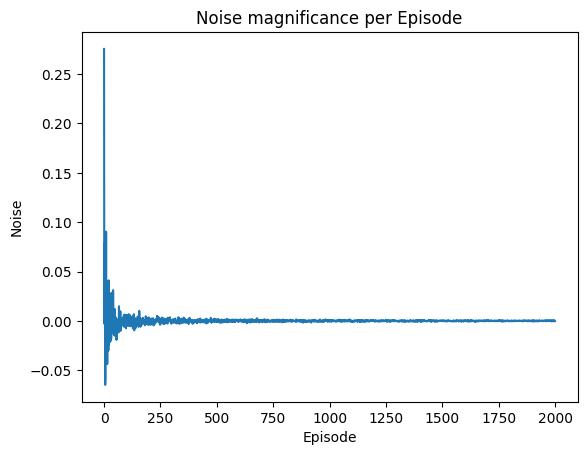

In [ ]:
print("에피소드에 따른 랜덤 노이즈 감소")

plt.plot(noise_mean)
plt.xlabel('Episode')
plt.ylabel('Noise')
plt.title('Noise magnificance per Episode')
plt.show()

학습이 끝난 이후 환경의 에피소드 성공률과 최종 Q-table 출력
<br> 이 때, state의 순서는 좌측 상단부터 오른쪽으로 진행
<br> 즉, 15번째 항은 목적지 직전의 state를 의미

In [ ]:
print("Success rate: " + str(sum(total_reward) / num_episodes))
print("Final Q-Table Values")
print(Q)

Success rate: 0.904
Final Q-Table Values
[[0.         0.95099005 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.96059601 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.970299   0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.890109   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.99       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


다음으로, 에피소드 별 학습 성공.실패 그래프 출력<br>
처음에 보상을 얻는 데 성공하여도 Random Noise의 값이 큰 경우
가치 함수 값보다 Noise값이 커서 탐험 진행 가능<br>
이후 Noise값이 충분히 줄어들면 활용을 통해 가치함수와 정책 업데이트

In [ ]:
##############################코드 작성 ####################################

#total reward를 입력받아 50에피소드의 평균 보상값의 list를 반환하는 함수 작성
#만약 50에피소드 이전인 경우, 현재 에피소드까지 전체 평균을 계산
#이 외엔 이전 50에피소드의 평균을 계산



#############################################################################

print("실제 reward의 마지막 50step 평균:", np.mean(total_reward[-50:]))
window = make_plot_list(total_reward)
print("window의 마지막 step 출력값:", window[-1])


실제 reward의 마지막 50step 평균: 1.0
window의 마지막 step 출력값: 1.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


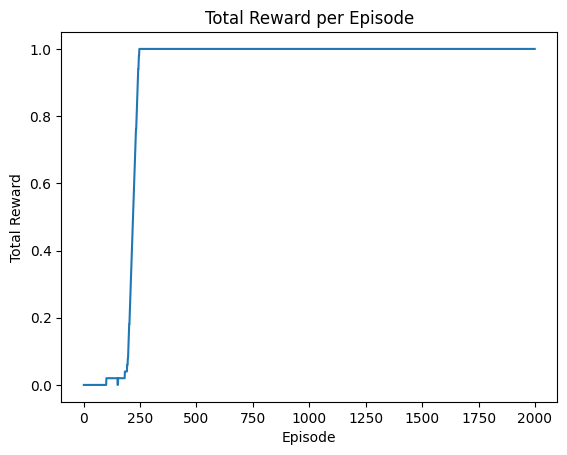

In [ ]:
##############################코드 작성 ####################################

# 에피소드별 성공, 실패 그래프 출력

#total_reward로부터 window 생성


#window list를 이용해 그래프 출력
#x축은 episodes, y축은 total rewards, title은 Total Reward per Episodes








#############################################################################



학습된 정책을 이용해 환경의 에피소드 예시를 확인

In [ ]:
##############################코드 작성 ####################################

#학습 환경과 Q-table을 입력받아 에피소드가 끝날 때 까지 render하는 함수 생성



#############################################################################



In [ ]:
simulate_policy(env, Q)

print("Simulation complete.")

env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Simulation complete.


#2. E-greedy 방식
E-Greedy 방식은 어떠한 확률값 e를 주어, e의 확률로 탐험 진행<br> 예를 들어 e=0.99 이면 99%의 확률로 기존의 정보를 활용하고, 1%의 확률로 탐험을 진행<br> Random Noise 방법과 마찬가지로 학습이 진행될수록 탐험 확률을 낮추도록 작성

In [ ]:
current_episode_num = 1
state = env.reset()
reward_sum = 0
done = False


##############################코드 작성 ####################################

#학습이 진행될수록 점점 줄어드는 epsilon 값을 정의


#epsilon의 확률로 무작위 행동을 선택(출력함수 추가)
#이외의 경우엔 Q값을 따라가도록 행동을 선택









#############################################################################


print("epsilon 값:", e)
print("선택된 행동:", action)

임의의 행동 선택
epsilon 값: 1.0
선택된 행동: 3


In [ ]:

##############################코드 작성 ####################################

#env_step


#Q값 업데이트



#############################################################################



print("다음 상태 : {}, 보상 : {}, 에피소드 종료 여부 : {}".format(new_state, reward, done))
print("Q값 변화량:", alpha * (reward + discount_factor * np.max(Q[new_state]) - Q[state, action]) )
print("="*30)


다음 상태 : 0, 보상 : 0.0, 에피소드 종료 여부 : False
Q값 변화량: 0.0


In [ ]:
# 환경 설정 및 변수 초기화
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

env = gym.make('FrozenLake-v1')

# Q Table
Q = np.zeros([env.observation_space.n, env.action_space.n])

discount_factor = 0.99
num_episodes = 2000
alpha = 0.9

total_reward = []
noise_mean = []

In [ ]:
#학습
for i in range(num_episodes):



    ##############################코드 작성 ####################################
    #환경 및 reward, done_mask 초기화




    #학습이 진행될수록 점점 줄어드는 epsilon 값을 정의


    #episode가 끝나기 전 까지 반복하며 epsilon의 확률로 random action을 취하는 함수와 Q 업데이트 함수 작성
    while not done:
        #epsilon의 확률로 무작위 행동을 선택



        #이외의 경우엔 Q값을 따라가도록 행동을 선택


        #env.step 및 Q값 업데이트 진행

        #reward 및 state 갱신

    #############################################################################

    total_reward.append(reward_sum)
    noise_mean.append(e)

epsilon_decay(랜덤한 행동을 선택할 확률)


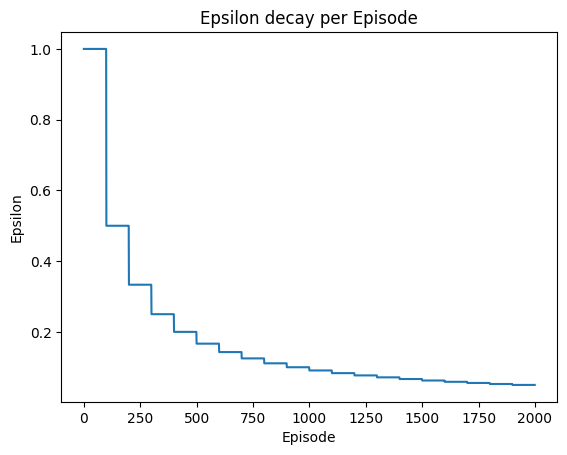

In [ ]:
print("epsilon_decay(랜덤한 행동을 선택할 확률)")

plt.plot(noise_mean)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon decay per Episode')
plt.show()

In [ ]:
#성공률과 Q-table 값
print("Success rate: " + str(sum(total_reward) / num_episodes))
print("Final Q-Table Values")
print(Q)

Success rate: 0.806
Final Q-Table Values
[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.92274393 0.89904047]
 [0.93206535 0.78572142 0.         0.        ]
 [0.82934939 0.         0.         0.        ]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.98009017 0.         0.91340505]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.97017461]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


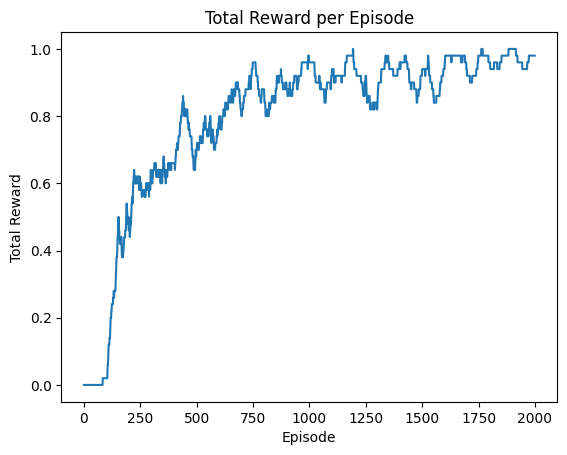

In [ ]:
# 에피소드별 성공, 실패 그래프 출력
window = make_plot_list(total_reward)
plt.figure()
plt.plot(window)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

탐험을 통해 충분히 Q-table 값을 업데이트 했다면 탐험 확률을 낮출 필요가 있음을 확인 가능

In [ ]:
#좌표 (4,3), 목적지 직전 상태에서 수행하는 최적 행동 확인
print("What is the best move when i'm on 15?")
my_Action = np.argmax(Q[14])

if my_Action==0:
  print("Left")

elif my_Action==1:
  print("Down")

elif my_Action==2:
  print("Right")

else: print("up")

simulate_policy(env, Q)

What is the best move when i'm on 15?
Right
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


# Stochastic 환경에서의 Q-러닝

미끄러운 빙판길에서는 원하는 방향으로 가지 않고, 미끄러질 수 있음.
<br>
즉, 똑같은 행동을 하더라도 확률적으로 다른 상태에 도달 가능.
<br><br>
**Q-Learning 방법이 Stochastic 환경에서도 학습 가능한지 실습**

In [ ]:

##############################코드 작성 ####################################

#register 등록시, kwargs의 요소중 'is_slippery' 를 True로 설정.

register(
    id=,
    entry_point=,
    kwargs={'map_name': ,
            'is_slippery': }      #이번엔 빙판길 위에서 미끄러질 수 있는 가능성을 생각하여 환경을 설정
)

#############################################################################


In [ ]:
##############################코드 작성 ####################################

#환경 생성 및 초기화



#오른쪽으로 향하는 동일한 행동을 수행하고(action = 2), 이동하는 state를 확인


#############################################################################


print("다음 상태: ", new_state)

다음 상태:  1


In [ ]:
import gym
import numpy as np
##############################코드 작성 ####################################

#env설정과 Q-table 초기화


#기존과 동일한 값의 감쇄율, 학습률, 에피소드 수 설정


#최종 보상 합 초기화


#############################################################################



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/seeding.py:41: DeprecationWarning: WARN: Function `rng.rand(*size)` is marked as deprecated and will be removed in the future. Please use `Generator.random(size)` instead.
  seed = create_seed(max_bytes=max_bytes)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: I

In [ ]:
#학습
for i in range(num_episodes):
    state = env.reset()
    reward_sum = 0
    done = False

    while not done:
      ##############################코드 작성 ####################################

        #Q값에 random noise를 추가하고, 이 때 최대 값을 action으로 선택



        #선택된 action으로 env.step 진행



        #Q 값 업데이트



        #보상의 총 합과 state 갱신



      #############################################################################

    total_reward.append(reward_sum)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
/usr/local/lib/python3.10/dist-packages/gym/utils/seeding.py:41: DeprecationWarning: WARN: Function `rng.rand(*size)` is marked as deprecated and will be removed in the future. Please use `Generator.random(size)` instead.
  seed = create_seed(max_bytes=max_bytes)
/usr/l

In [ ]:
#성공률과 Q-table 값
print("Success rate: " + str(sum(total_reward) / num_episodes))
print("Final Q-Table Values")
print(Q)

Success rate: 0.6585
Final Q-Table Values
[[5.19868558e-01 7.47561476e-03 4.48353806e-03 7.37874070e-03]
 [4.83602159e-05 4.78281997e-05 0.00000000e+00 7.90009988e-01]
 [5.72750669e-03 6.79086451e-01 6.12081413e-03 5.57733863e-03]
 [3.26432760e-03 8.87221037e-04 4.69852702e-04 4.09139070e-01]
 [7.59479341e-01 2.08729010e-03 5.26547232e-03 7.09516957e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61403439e-06 7.92515831e-05 4.46417860e-01 5.90767923e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.12326060e-05 6.04242175e-05 0.00000000e+00 7.80472532e-01]
 [1.73281715e-03 9.04871324e-01 2.39046883e-03 0.00000000e+00]
 [9.36401907e-01 1.02710100e-04 1.48660479e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.68506502e-01 8.49522409e-04]
 [0.00000000e+00 9.99985036e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


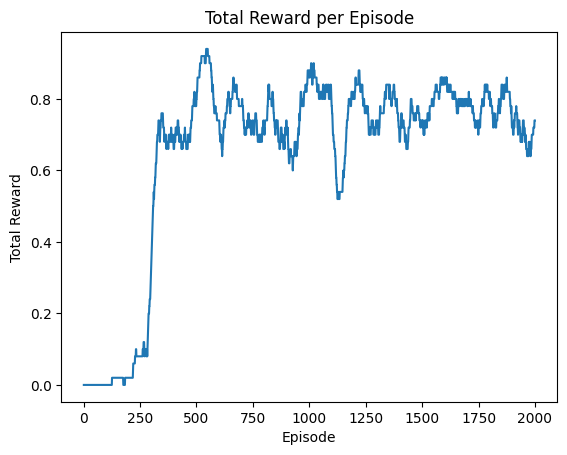

In [ ]:
# 에피소드별 성공, 실패 그래프 출력
window = make_plot_list(total_reward)
plt.figure()
plt.plot(window)
total_reward_sum_q_learning = window
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

In [ ]:
#좌표 (4,3), 목적지 직전 상태에서 수행하는 최적 행동 확인
print("What is the best move when i'm on 15?")
my_Action = np.argmax(Q[14])

if my_Action==0:
  print("Left")

elif my_Action==1:
  print("Down")

elif my_Action==2:
  print("Right")

else: print("up")

simulate_policy(env, Q)

What is the best move when i'm on 15?
Down
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


# SARSA
이전 실험에서 사용한 방법은, Q-Learning이며, 다음과 같이 표현 가능.
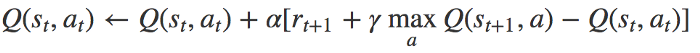
<br> SARSA는 다음과 같은 식을 따르도록 학습<br>
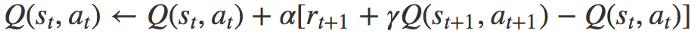

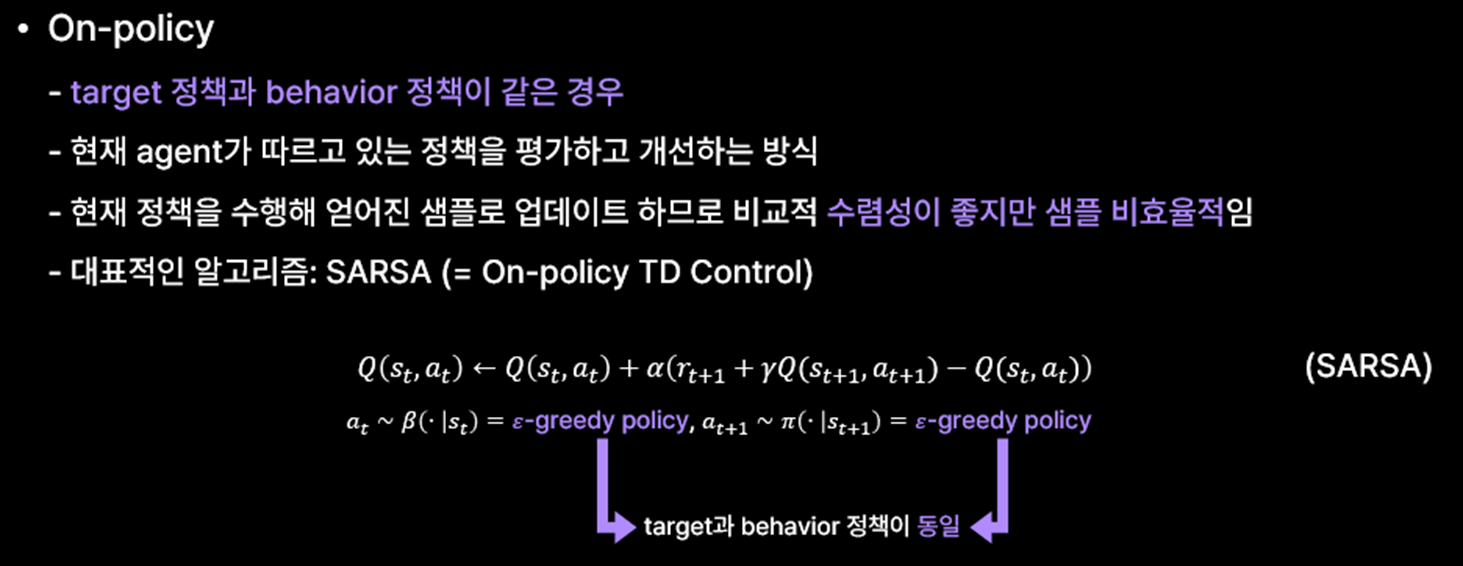

**1.** **Random Noise 방법의 SARSA**

In [ ]:
env = gym.make("FrozenLake-v2")                                     #Slippery 환경 설정

Q = np.zeros([env.observation_space.n, env.action_space.n])         #  Q-테이블 초기화

num_episodes = 2000
discount_factor = 0.99
alpha = 0.9

state = env.reset()
reward_sum = 0
done = False
action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n))

print("현재 상태 : {}, 현재 행동 : {}".format(state,action))

현재 상태 : 0, 현재 행동 : 1


/usr/local/lib/python3.10/dist-packages/gym/utils/seeding.py:41: DeprecationWarning: WARN: Function `rng.rand(*size)` is marked as deprecated and will be removed in the future. Please use `Generator.random(size)` instead.
  seed = create_seed(max_bytes=max_bytes)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `

In [ ]:
##############################코드 작성 ####################################

#env.step을 통해 다음 tuple 획득


#다음 행동을 결정할 때, 랜덤 노이즈 방법을 이용해 선택(현재 정책을 이용해 선택).



#Q 값의 업데이트에서, Q-Learning과 SARSA의 차이가 발생
#max Q 값 대신, new_state와 new_action의 Q값 이용


#############################################################################

print("현재 상태 : {}, 현재 행동 : {}, 다음 상태 : {}, 다음 행동 : {}".format(state,action,new_state,new_action))
print("Q값 변화량:", alpha * (reward + discount_factor * Q[new_state, new_action] - Q[state, action]))


현재 상태 : 0, 현재 행동 : 1, 다음 상태 : 4, 다음 행동 : 1
Q값 변화량: 0.0


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 


In [ ]:
import gym
from gym import wrappers
import numpy as np

env = gym.make("FrozenLake-v2")

Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000
discount_factor = 0.99
alpha = 0.9

total_reward = []

In [ ]:
for i in range(num_episodes):
    ##############################코드 작성 ####################################

    #환경 초기화





    #random_noise 방법을 이용한 첫 행동 선택




    #에피소드가 끝날 때 까지 반복하며 ,SARSA 업데이트 진행
    while not done:

        #env_step 및 새로운 action 선택


        #Q 값의 업데이트에서, Q-Learning과 SARSA의 차이가 발생


        #reward 합, state와 action 갱신





    #############################################################################


    total_reward.append(reward_sum)

In [ ]:
#성공률과 Q-table 값
print("Success rate: " + str(sum(total_reward) / num_episodes))
print("Final Q-Table Values")
print(Q)

Success rate: 0.7285
Final Q-Table Values
[[1.08302486e-03 2.32676697e-04 2.01954580e-02 2.01484966e-04]
 [2.02188846e-03 1.80474810e-04 2.71914394e-04 5.50803373e-04]
 [3.32855650e-05 1.14587915e-02 6.07776227e-05 3.89039559e-04]
 [3.35800524e-04 2.04139539e-06 2.78746994e-04 1.12561419e-01]
 [6.15946987e-02 1.44765884e-04 1.89428523e-04 1.27591933e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.07550102e-06 6.15838520e-10 2.85245966e-05 1.78581498e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.51257067e-04 2.24859904e-07 1.27097019e-04 8.52077799e-03]
 [3.80949670e-04 8.42358053e-04 2.97900892e-05 1.97317698e-04]
 [1.96818559e-05 8.02201010e-01 3.09816386e-04 4.85917893e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.01842143e-04 0.00000000e+00 4.85044940e-02 2.11672251e-05]
 [4.65985218e-04 0.00000000e+00 0.00000000e+00 9.90033772e-01]
 [0.00000000e

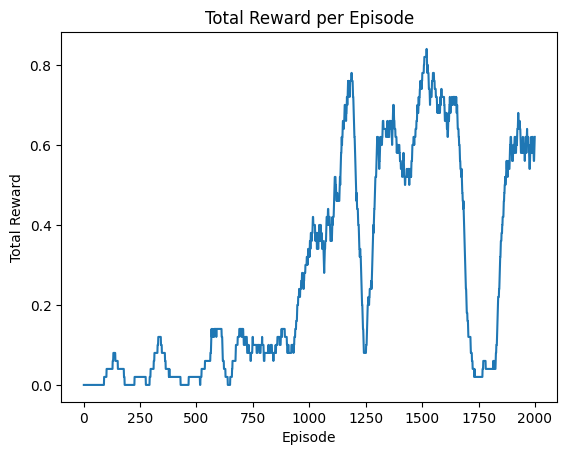

In [ ]:
# 에피소드별 성공, 실패 그래프 출력
window = make_plot_list(total_reward)
plt.figure()
plt.plot(window)
total_reward_sum_sarsa = window
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

In [ ]:
#좌표 (4,3), 목적지 직전 상태에서 수행하는 최적 행동 확인
print("What is the best move when i'm on 15?")
my_Action = np.argmax(Q[14])

if my_Action==0:
  print("Left")

elif my_Action==1:
  print("Down")

elif my_Action==2:
  print("Right")

else: print("up")

simulate_policy(env, Q)

What is the best move when i'm on 15?
Down
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Ri

**2.** **e-greedy 방법의 SARSA**

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

env = gym.make("FrozenLake-v2")

Q = np.zeros((env.observation_space.n, env.action_space.n))

num_episodes= 2000
alpha = 0.9
discount_factor = 0.9

epsilon = 1.0
epsilon_decay = 0.001   #이번엔 epsilon 값의 감소 방법을 일정하게 정한 scale만큼 지속적으로 감소시키도록 진행

total_reward = []

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment FrozenLake-v2 is out of date. You should consider upgrading to version `v4`.
/usr/local/lib/python3.10/dist-packages/gym/utils/seeding.py:41: DeprecationWarning: WARN: Function `rng.rand(*size)` is marked as deprecated and will be removed in the future. Please use `Generator.random(size)` instead.
  seed = create_seed(max_bytes=max_bytes)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default beh

In [ ]:
for i in range(num_episodes):

    #환경 초기화
    state = env.reset()
    reward_sum = 0
    done = False

    ##############################코드 작성 ####################################

    #e-greedy 방법을 이용해 첫 행동 선택





    #에피소드가 끝날 때 까지 반복하며 ,SARSA 업데이트 진행

    #episode가 끝나기 전 까지 반복하며 epsilon의 확률로 random action을 취하는 함수와 Q 업데이트 함수 작성
    while not done:

        #env.step 진행

        #epsilon의 확률로 무작위 행동을 선택



        #이외의 경우엔 Q값을 따라가도록 행동을 선택



        #Q 값의 업데이트에서, Q-Learning과 SARSA의 차이가 발생




        #reward, state, action 갱신




    #epsilon 값 천천히 감소(단, 0보단 크게)

    #############################################################################

    total_reward.append(reward_sum)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 


In [ ]:
#성공률과 Q-table 값
print("Success rate: " + str(sum(total_reward) / num_episodes))
print("Final Q-Table Values")
print(Q)

Success rate: 0.011
Final Q-Table Values
[[1.74018513e-06 8.71167148e-09 2.67608938e-10 5.50830444e-08]
 [1.16228437e-06 1.47277390e-07 2.26442865e-08 5.60055397e-07]
 [3.60619656e-06 3.33856371e-08 7.94369349e-09 4.70014487e-07]
 [3.26534362e-08 2.73755207e-07 8.23215572e-09 3.00517057e-08]
 [1.72117907e-07 2.23918058e-06 5.38741609e-07 3.10750136e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.42964904e-07 8.50918458e-07 6.68196435e-08 2.27184740e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.40848000e-06 8.15271764e-09 2.29366216e-08 7.89501423e-06]
 [5.92538594e-03 3.67528120e-02 1.53431009e-05 4.79956789e-05]
 [5.78433793e-07 9.97387613e-07 1.24443814e-02 2.11570779e-11]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.51020375e-05 1.00576693e-07 7.38355051e-01 7.32746006e-08]
 [1.93042582e-03 5.44906722e-03 5.42745307e-04 0.00000000e+00]
 [0.00000000e+

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


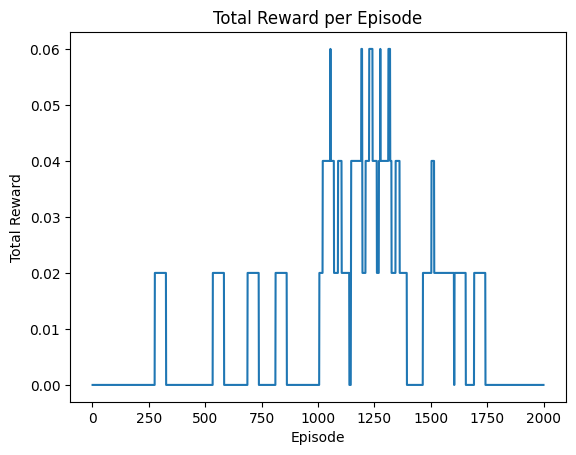

In [ ]:
# 에피소드별 성공, 실패 그래프 출력
window = make_plot_list(total_reward)
plt.figure()
plt.plot(window)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

In [ ]:
#좌표 (4,3), 목적지 직전 상태에서 수행하는 최적 행동 확인
print("What is the best move when i'm on 15?")
my_Action = np.argmax(Q[14])

if my_Action==0:
  print("Left")

elif my_Action==1:
  print("Down")

elif my_Action==2:
  print("Right")

else: print("up")

simulate_policy(env, Q)

What is the best move when i'm on 15?
Down
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
F

# Q-Learning vs SARSA 그래프 비교

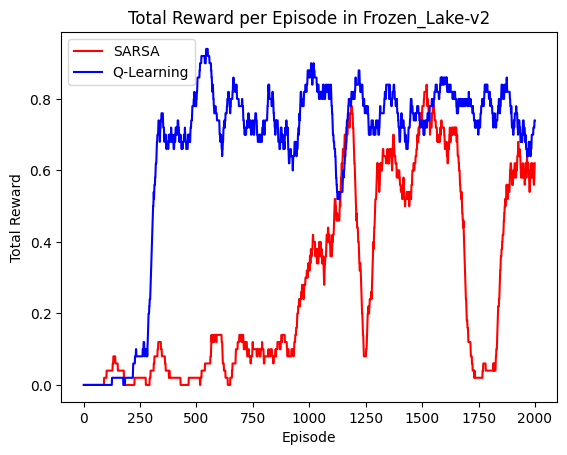

In [ ]:
plt.figure()
plt.plot(total_reward_sum_sarsa, label='SARSA', color='red')
plt.plot(total_reward_sum_q_learning, label='Q-Learning', color='blue')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode in Frozen_Lake-v2')
plt.legend()
plt.show()

#(Additional Work) Customize Frozen Lake



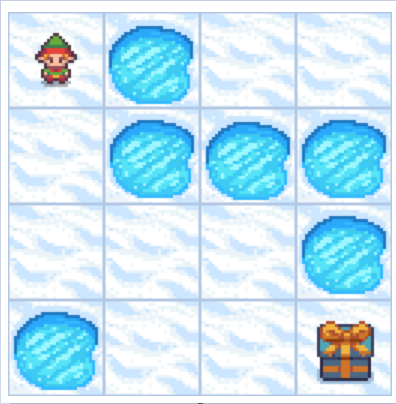

In [ ]:
#지금까진 모두 동일한 Hole 형태의 환경을 진행
#이번엔 시작 지점, 도착 지점, 구멍의 위치를 직접 설정하여 학습 진행
#S(start) = 시작점, H(hole) = 구멍, F(field)= 평지, G(goal) = 목적지
mydesc=["SHFF", "FHHH", "FFFH", "HFFG"]

In [ ]:


register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
##############################코드 작성 ####################################

#register의 kwargs 요소 중 'desc' 에 직접 작성한 mydesc를 할당
    kwargs=
)

#############################################################################



In [ ]:
import gym
from gym import wrappers
import numpy as np

env = gym.make("FrozenLake-v3")

Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000
discount_factor = 0.99
alpha = 0.9

total_reward = []

In [ ]:
for i in range(num_episodes):

    #환경 초기화
    state = env.reset()
    reward_sum = 0
    done = False
    ##############################코드 작성 ####################################

    #random_noise 방법을 이용해 첫 행동 선택



    #에피소드가 끝날 때 까지 반복하며 ,SARSA 업데이트 진행









    #############################################################################

    total_reward.append(reward_sum)


In [ ]:
#성공률과 Q-table 값
print("Success rate: " + str(sum(total_reward) / num_episodes))
print("Final Q-Table Values")
print(Q)

Success rate: 0.8175
Final Q-Table Values
[[0.         0.95099005 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.96059601 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.970299   0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.99       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


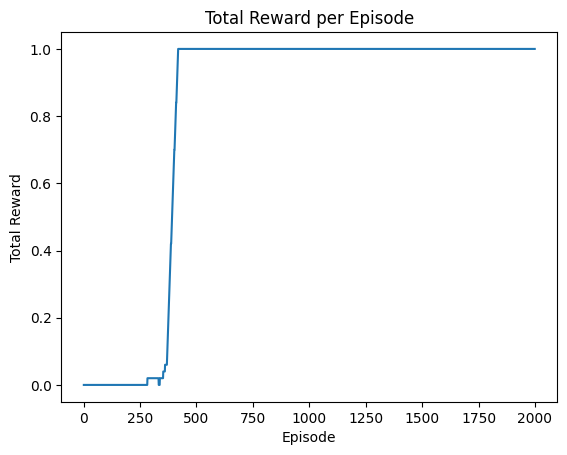

In [ ]:
# 에피소드별 성공, 실패 그래프 출력
window = make_plot_list(total_reward)
plt.figure()
plt.plot(window)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

In [ ]:
#좌표 (4,3), 목적지 직전 상태에서 수행하는 최적 행동 확인
print("What is the best move when i'm on 15?")
my_Action = np.argmax(Q[14])

if my_Action==0:
  print("Left")

elif my_Action==1:
  print("Down")

elif my_Action==2:
  print("Right")

else: print("up")

simulate_policy(env, Q)

What is the best move when i'm on 15?
Right
  (Down)
SHFF
FHHH
FFFH
HFFG
  (Down)
SHFF
FHHH
FFFH
HFFG
  (Right)
SHFF
FHHH
FFFH
HFFG
  (Down)
SHFF
FHHH
FFFH
HFFG
  (Right)
SHFF
FHHH
FFFH
HFFG
  (Right)
SHFF
FHHH
FFFH
HFFG


In [ ]:

register(
    id='FrozenLake-v4',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
##############################코드 작성 ####################################

#register의 요소 중 'map_name'의 크기를 '4x4' 에서 '8x8'로 변경
    kwargs=
) #기존 4x4 대신 8x8 환경 설정. 이에 따라 Q-table의 크기도 64x4 = 256으로 증가

#############################################################################



/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:542: UserWarning: WARN: Overriding environment FrozenLake-v4


In [ ]:
##############################코드 작성 ####################################

#환경 초기화 및 Q_table 초기화

#############################################################################


print("Gym 환경:", env)
# Q Table을 초기화
print("State(Observation) 공간 크기:", env.observation_space.n)
print("Action 공간 크기:", env.action_space.n)
print("Q_table 값:", Q)
print("Q_table 크기:", Q.size)

Gym 환경: <OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v4>>>>>
State(Observation) 공간 크기: 64
Action 공간 크기: 4
Q_table 값: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 

In [ ]:
import gym
from gym import wrappers
import numpy as np

env = gym.make("FrozenLake-v4")

Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000
discount_factor = 0.99
alpha = 0.9

total_reward = []

In [ ]:
for i in range(num_episodes):
    state = env.reset()
    reward_sum = 0
    done = False
    action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) * (1. / (i + 1)))

    while not done:
        new_state, reward, done, _ = env.step(action)
        new_action = np.argmax(Q[new_state, :] + np.random.randn(1, env.action_space.n) * (1. / (i + 1)))

        Q[state, action] = Q[state, action] + alpha * (reward + discount_factor * Q[new_state, new_action] - Q[state, action])
        reward_sum += reward
        state = new_state
        action = new_action
    total_reward.append(reward_sum)


In [ ]:
#성공률과 Q-table 값
print("Success rate: " + str(sum(total_reward) / num_episodes))
print("Final Q-Table Values")
print(Q)

Success rate: 0.3225
Final Q-Table Values
[[0.         0.         0.87752102 0.        ]
 [0.         0.         0.88638487 0.        ]
 [0.         0.89533825 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.90438208 0.        ]
 [0.         0.         0.91351725 0.        ]
 [0.         0.         0.92274469 0.        ]
 [0.         0.93206535 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.   

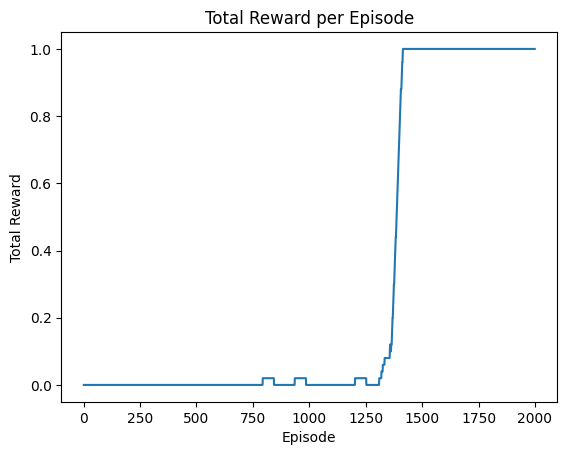

In [ ]:
# 에피소드별 성공, 실패 그래프 출력
window = make_plot_list(total_reward)
plt.figure()
plt.plot(window)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

In [ ]:
simulate_policy(env, Q)

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFF

#실험환경: Taxi Environment

사용은.. e-greedy sarsa, e-greedy q-learning으로 두 번 진행.

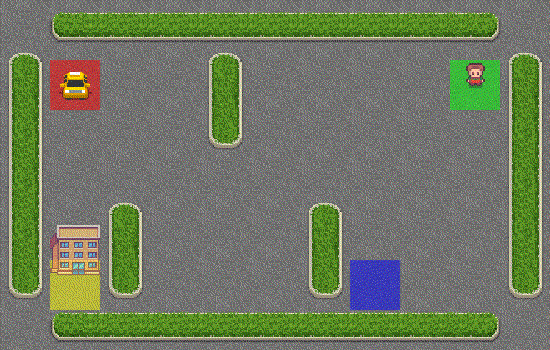

조금 더 복잡한 환경인 Taxi 환경에서 실험 진행

상태는 총 500개로, 25개의 택시 위치, 5개의 승객 위치, 4개의 도착지로 정의

행동은 총 6개로, 상하좌우 4개 + 승객 탑승 + 승객 하차 로 정의

에피소드는 승객이 택시에서 내리는 경우 종료

보상은 다음과 같음

1. timestep에 따라 -1
2. 정확한 위치에 승객을 하차시킬 경우 +20
3. 올바르지 않은 위치에서 승객 탑승 또는 하차시 -10

**목표: 낭비 없이 승객의 위치로 이동 후 탑승, 이후 알맞는 목적지에 승객 하차.**

In [ ]:

##############################코드 작성 ####################################

#환경 설정 및 Q- table 초기화

#############################################################################


print("Gym 환경:", env)
print("State(Observation) 공간 크기:", env.observation_space.n)
print("Action 공간 크기:", env.action_space.n)

print("Q_table 값:", Q)
print("Q_table 크기:", Q.size)

Gym 환경: <TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<TaxiEnv<Taxi-v3>>>>>>
State(Observation) 공간 크기: 500
Action 공간 크기: 6
Q_table 값: [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Q_table 크기: 3000


In [ ]:

##############################코드 작성 ####################################

#환경 초기화 및 done_mask, reward 초기화




#에피소드 종료까지 반복하며, action 선택 -> env.step -> render를 반복
#이 때 각 state마다 reward와 누적보상을 함께 출력










#############################################################################




/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  Args:
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:280: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward: -10
Reward_sum: 0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Reward: -1
Reward_sum: -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Reward: -1
Reward_sum: -11
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Reward: -1
Reward_sum: -12
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Reward: -1
Reward_sum: -13
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Reward: -1
Reward_sum: -14
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Reward: -1
Reward_sum: -15
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward: -10
Reward_sum: -16
+---------+
|R: | : :G|
| : | :

**1.** **Q-러닝 + e-greedy**

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

##############################코드 작성 ####################################

#gym_make 이후 env, Q-table 초기화




#하이퍼 패러미터 설정(감쇄율 0.9, 학습률 0.9, 에피소드 수 2000)





#e-greedy의 epsilon값 설정(초기값 1, decay 0.001)



#total reward 초기화



#############################################################################

In [ ]:
for i in range(num_episodes):
    #환경 초기화
    state = env.reset()
    reward_sum = 0
    done = False
    ##############################코드 작성 ####################################

    #e-greedy 방법을 이용해 action 선택, Q-러닝 방법을 통한 업데이트 진행








    #epsilon_decay에 따라 천천히 epsilon값 감소


    #############################################################################
    total_reward.append(reward_sum)






In [ ]:
#성공률과 Q-table 값
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[ 0.          0.          0.          0.          0.          0.        ]
 [-0.58568213  0.4603532  -0.58568563  0.4603532   1.62261467 -8.53964718]
 [ 4.34889845  5.94323     4.348907    5.94323     7.7147     -3.05677   ]
 ...
 [ 6.31489606  9.683       7.66562587  5.94314562 -1.39445014 -1.29580907]
 [ 1.05945354  2.91401566  1.62259808  2.24463124 -7.38813936 -7.39325545]
 [14.29999345 11.87       14.3        17.          5.2999381   5.29996796]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


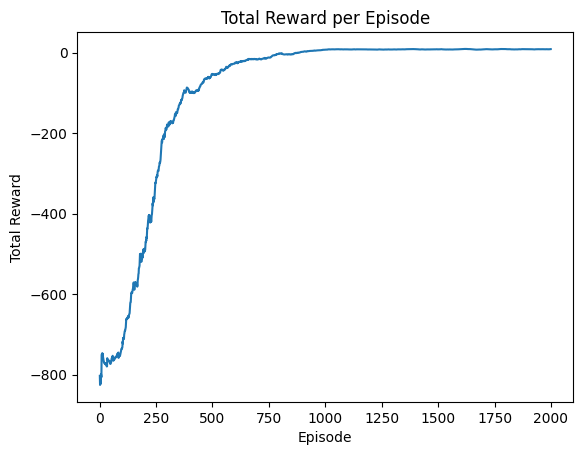

In [ ]:
# 에피소드별 보상 그래프 출력
window = make_plot_list(total_reward)
plt.figure()
plt.plot(window)
total_reward_sum_taxi_q_learning = window
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

In [ ]:
simulate_policy(env, Q)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


**2.** **SARSA + e-greedy**

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

env = gym.make("Taxi-v3")

Q = np.zeros((env.observation_space.n, env.action_space.n))

num_episodes= 2000
alpha = 0.9
discount_factor = 0.9

epsilon = 1.0
epsilon_decay = 0.001

total_reward = []

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.


In [ ]:
for i in range(num_episodes):
    #환경 초기화
    state = env.reset()
    reward_sum = 0
    done = False

    #e-greedy 방법을 이용해 action 선택, Q-러닝 방법을 통한 업데이트 진행

    if np.random.random(1) < epsilon:
          action = env.action_space.sample()
    else:
      action = np.argmax(Q[state])
    action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) * (1. / (i + 1)))

    ##############################코드 작성 ####################################

    #반복문을 통해 env.step -> e-greedy로 new_action 선택, Q값 업데이트, reward, state 갱신 진행








    # 천천히 epsilon값 감소

    #############################################################################
    total_reward.append(reward_sum)



In [ ]:
#성공률과 Q-table 값
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[ -3.0098259   -2.56752775  -3.12860439  -2.69154046 -24.7444465
  -10.794339  ]
 [-25.43134083 -25.49839175 -10.         -26.88929113 -32.47679731
  -33.60876579]
 [-20.80446516 -31.73032341 -10.         -34.82213487 -27.84655962
  -33.4091309 ]
 ...
 [-29.90326007 -20.53093291 -22.56860322 -22.82356251 -30.84176902
  -28.54749332]
 [-10.12261137 -16.92492766 -11.87039007 -32.63847347 -26.74791386
  -45.04277946]
 [-13.85483266 -28.24777849 -21.02154682 -16.03496643 -33.9128567
  -29.53691143]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


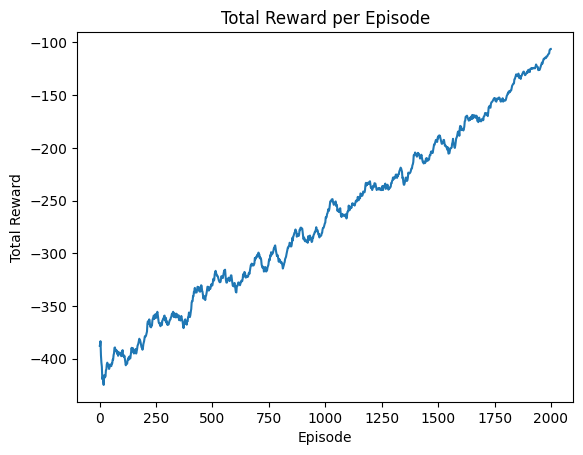

In [ ]:
# 에피소드별 보상 그래프 출력
window = make_plot_list(total_reward)
plt.figure()
plt.plot(window)
total_reward_sum_taxi_sarsa = window
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

In [ ]:
simulate_policy(env, Q)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: 

# Q-Learning vs SARSA 그래프 비교

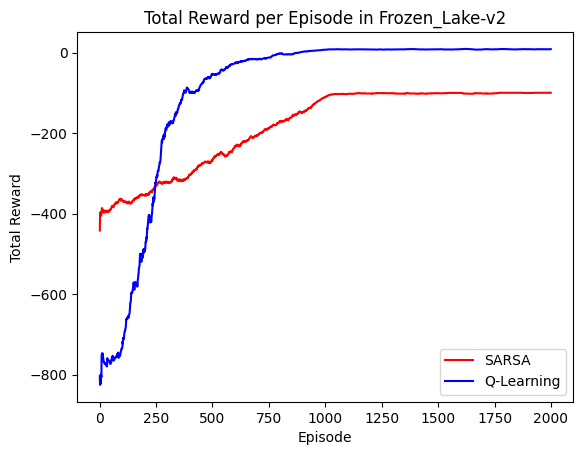

In [ ]:
plt.figure()
plt.plot(total_reward_sum_taxi_sarsa, label='SARSA', color='red')
plt.plot(total_reward_sum_taxi_q_learning, label='Q-Learning', color='blue')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode in Frozen_Lake-v2')
plt.legend()
plt.show()